In [22]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [23]:
data1 = pd.read_csv('../stats_100_etfs.csv')
data = pd.read_csv('../hun_etfs.csv')
data

,date,open,high,low,close,volume,ticker
0,2015-01-05,204.17,204.37,201.35,201.72,169632646,SPY
1,2015-01-06,202.09,202.72,198.86,199.82,209151408,SPY
2,2015-01-07,201.42,202.72,200.88,202.31,125346709,SPY
3,2015-01-08,204.01,206.16,203.99,205.90,147217784,SPY
4,2015-01-09,206.40,206.42,203.51,204.25,158567288,SPY
...,...,...,...,...,...,...,...
125695,2019-12-24,22.82,22.82,22.77,22.78,2633089,BKLN
125696,2019-12-26,22.79,22.81,22.79,22.79,2999603,BKLN
125697,2019-12-27,22.79,22.80,22.78,22.79,2654723,BKLN
125698,2019-12-30,22.80,22.81,22.71,22.71,3697412,BKLN


In [24]:
df = data.loc[data['ticker'] == 'LQD']
df = df.set_index('date')
df

,open,high,low,close,volume,ticker
date,,,,,,
2015-01-05,120.19,120.68,120.09,120.32,3218848,LQD
2015-01-06,120.65,121.17,120.47,120.81,5313367,LQD
2015-01-07,120.64,121.05,120.51,120.97,1636559,LQD
2015-01-08,120.65,120.67,120.37,120.58,2156897,LQD
2015-01-09,120.42,121.02,120.39,120.90,1530434,LQD
...,...,...,...,...,...,...
2019-12-24,127.56,127.96,127.50,127.85,2638011,LQD
2019-12-26,128.04,128.10,127.80,128.08,3879905,LQD
2019-12-27,128.35,128.40,128.26,128.26,8752092,LQD


In [25]:
# from datetime import datetime
# df['date'] = pd.to_datetime(df['date'])

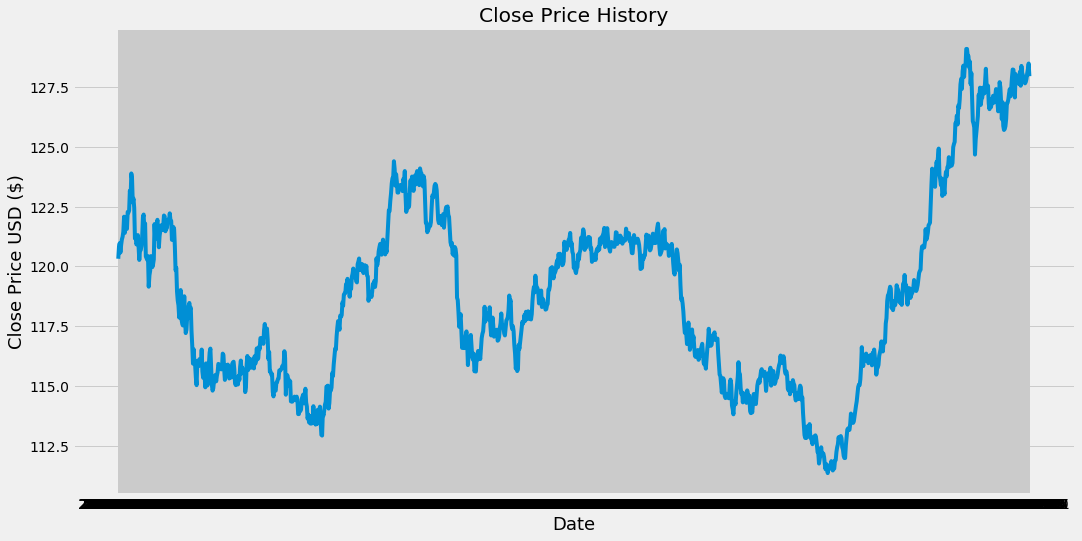

In [26]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.savefig('LQD_closeprice.png')
plt.show()

In [27]:
#Create a new dataframe with only the 'Close column
data = df[['close']]
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .95 )

training_data_len

1195

In [28]:
dataset

array([[120.32],
       [120.81],
       [120.97],
       ...,
       [128.26],
       [128.49],
       [127.96]])

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.50535211],
       [0.53295775],
       [0.54197183],
       ...,
       [0.95267606],
       [0.9656338 ],
       [0.93577465]])

In [30]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
  x_train.append(train_data[i-30:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 31:
    print(x_train)
    print(y_train)
    print()

[array([0.50535211, 0.53295775, 0.54197183, 0.52      , 0.53802817,
       0.55098592, 0.5571831 , 0.56901408, 0.60450704, 0.56619718,
       0.58197183, 0.57915493, 0.57577465, 0.61577465, 0.61408451,
       0.61915493, 0.66591549, 0.64957746, 0.70647887, 0.69408451,
       0.63774648, 0.64732394, 0.62535211, 0.55323944, 0.55774648,
       0.53915493, 0.54366197, 0.56112676, 0.53408451, 0.50253521])]
[0.5267605633802823]

[array([0.50535211, 0.53295775, 0.54197183, 0.52      , 0.53802817,
       0.55098592, 0.5571831 , 0.56901408, 0.60450704, 0.56619718,
       0.58197183, 0.57915493, 0.57577465, 0.61577465, 0.61408451,
       0.61915493, 0.66591549, 0.64957746, 0.70647887, 0.69408451,
       0.63774648, 0.64732394, 0.62535211, 0.55323944, 0.55774648,
       0.53915493, 0.54366197, 0.56112676, 0.53408451, 0.50253521]), array([0.53295775, 0.54197183, 0.52      , 0.53802817, 0.55098592,
       0.5571831 , 0.56901408, 0.60450704, 0.56619718, 0.58197183,
       0.57915493, 0.57577465, 0.6

In [31]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1165, 30, 1)

In [33]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [34]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1165/1165 [==============================] - 59s 51ms/step - loss: 0.0034


In [36]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 30: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i, 0])

In [37]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [38]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [39]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [40]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.1953962759909602

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


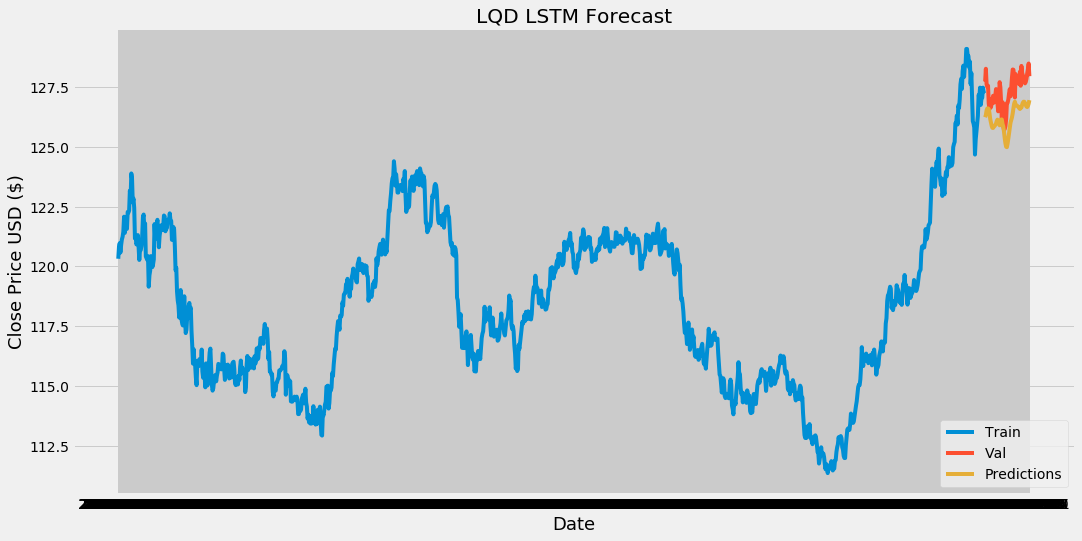

In [42]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('LQD LSTM Forecast')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('lqd_lstm_forecast.png')
plt.show()

In [43]:
valid

,close,Predictions
date,,
2019-10-03,127.74,126.241943
2019-10-04,128.27,126.330795
2019-10-07,127.62,126.528954
2019-10-08,127.51,126.611259
2019-10-09,127.56,126.611267
...,...,...
2019-12-24,127.85,126.687813
2019-12-26,128.08,126.669312
2019-12-27,128.26,126.715561


In [44]:
valid['difference'] = valid['close'] - valid['Predictions']
valid['difference_pct'] = valid['difference']/valid['close']
valid['difference_pct'] = valid['difference_pct'].map("{:.2%}".format)
valid

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,close,Predictions,difference,difference_pct
date,,,,
2019-10-03,127.74,126.241943,1.498057,1.17%
2019-10-04,128.27,126.330795,1.939205,1.51%
2019-10-07,127.62,126.528954,1.091046,0.85%
2019-10-08,127.51,126.611259,0.898741,0.70%
2019-10-09,127.56,126.611267,0.948733,0.74%
...,...,...,...,...
2019-12-24,127.85,126.687813,1.162187,0.91%
2019-12-26,128.08,126.669312,1.410688,1.10%
2019-12-27,128.26,126.715561,1.544439,1.20%


In [45]:
valid.to_csv('lqd_predictions_lstm.csv')

In [75]:
# #Get the quote
# spy_quote = web.DataReader('SPY', data_source='yahoo', start='2019-11-27', end='2020-01-10')
# #Create a new dataframe
# new_df = spy_quote.filter(['Close'])
# #Get teh last 60 day closing price values and convert the dataframe to an array
# last_60_days = new_df[-60:].values
# #Scale the data to be values between 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# #Create an empty list
# X_test = []
# #Append teh past 60 days
# X_test.append(last_60_days_scaled)
# #Convert the X_test data set to a numpy array
# X_test = np.array(X_test)
# #Reshape the data
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# #Get the predicted scaled price
# pred_price = model.predict(X_test)
# #undo the scaling 
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)

In [76]:
# spy_quote2 = web.DataReader('SPY', data_source='yahoo', start='2019-11-27', end='2020-01-10')
# print(spy_quote2['Close'])